# Como se calculan las activaciones

In [39]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

## Paso 0: Preparar valores, y funciones basicas

In [40]:
person_seed = 123
day_seed = 123

In [41]:
def hour2min(hours):
    return int(hours * 60)

def min2hour(sec):
    return sec/(60)

In [42]:
normal_sleep = hour2min(8)
normal_high_occupation_time = hour2min(7)
normal_mid_occupation_time = hour2min(3)
max_var = 0.1

In [43]:
sleep_activation_prob = 0.02
high_occupation_prob = 0.1
mid_occupation_prob = 0.3
low_occupation_prob = 0.6

## Paso 1: Definir lo que es una ocupacion

In [44]:
class Occupation:
    def __init__(self, priority, time, probability, start_time = None):
        self.priority = priority
        self.time = int(time)
        self.probability = probability
        self.start_time = int(start_time) if start_time is not None else None

## Paso 2: Generar tiempos normales para un bot

In [45]:
np.random.seed(person_seed)


remaining_time = hour2min(24)

sleep_time = np.random.triangular(hour2min(6), hour2min(8), hour2min(12))
remaining_time -= sleep_time

work_time = np.random.triangular(hour2min(5), hour2min(7), hour2min(8))
remaining_time -= work_time

total_chores_time = np.random.triangular(hour2min(1), hour2min(3), hour2min(min2hour(remaining_time) - 1))
remaining_time -= total_chores_time

total_free_breaks_time = np.random.triangular(hour2min(1), hour2min(2), hour2min(min2hour(remaining_time) - 1))
remaining_time -= total_free_breaks_time

np.random.seed()

print(f'''Normal times:
    Sleep: {min2hour(sleep_time)}
    Work: {min2hour(work_time)}
    Chores: {min2hour(total_chores_time)}
    Free breaks: {min2hour(total_free_breaks_time)}
    Remaining: {min2hour(remaining_time)}''')

Normal times:
    Sleep: 9.300974334013972
    Work: 6.3102808896195794
    Chores: 2.7018040106025705
    Free breaks: 2.5774771336644693
    Remaining: 3.1094636320994082


## Paso 3: Generar variaciones del dia

In [46]:
np.random.seed(day_seed)


remaining_time = hour2min(24)

# Sleep
sleep_time = np.random.triangular(hour2min(6), hour2min(8), hour2min(12))
sleep_var = sleep_time * max_var * ((np.random.rand()-0.5)/0.5)

remaining_time -= sleep_time + sleep_var

# Work
work_time = np.random.triangular(hour2min(5), hour2min(8), hour2min(min2hour(remaining_time) - 1))
work_var = work_time * max_var * ((np.random.rand()-0.5)/0.5)

remaining_time -= work_time + work_var

# Chores
total_chores_time = np.random.triangular(hour2min(1), hour2min(3), hour2min(min2hour(remaining_time) - 1))
chores_var = total_chores_time * max_var * ((np.random.rand()-0.5)/0.5)
chores = np.random.rand(np.random.randint(3,high=7))
chores /= np.sum(chores)
chores *= total_chores_time

remaining_time -= total_chores_time + chores_var

# Random Breaks
total_free_breaks_time = np.random.triangular(hour2min(1), hour2min(2), hour2min(min2hour(remaining_time) - 1))
breaks_var = total_free_breaks_time * max_var * ((np.random.rand()-0.5)/0.5)
free_breaks = np.random.rand(np.random.randint(8,high=15))
free_breaks /= np.sum(free_breaks)
free_breaks *= total_free_breaks_time

np.random.seed()


print(f'''Variations:
    Sleep: {min2hour(sleep_time + sleep_var)}
    Work: {min2hour(work_time + work_var)}
    Chores: {min2hour(total_chores_time + chores_var)}
    Free breaks: {min2hour(total_free_breaks_time + breaks_var)}
    Remaining: {min2hour(remaining_time)}''')

Variations:
    Sleep: 8.903151822677637
    Work: 7.563134480731916
    Chores: 4.126932937592344
    Free breaks: 1.58821815255873
    Remaining: 3.4067807589981025


## Paso 4: Generar ocupaciones con estos tiempos

In [47]:
day_occupations = []

# Add Sleep
day_occupations += [Occupation(1, sleep_time + sleep_var, sleep_activation_prob, 0)]

# Add Work
day_occupations += [Occupation(3, work_time + work_var, high_occupation_prob)]

# Add chores
for c in chores:
    # set random start time
    start_time = np.random.triangular(sleep_time + sleep_var, hour2min(19), hour2min(24) - c)
    day_occupations += [Occupation(2, c, mid_occupation_prob, start_time=start_time)]
    
# Add random breaks
for f in free_breaks:
    # set random start time
    start_time = np.random.triangular(sleep_time + sleep_var, hour2min(14), hour2min(24) - f)
    day_occupations += [Occupation(0, f, low_occupation_prob, start_time=start_time)]
    
day_occupations.sort(key=lambda x: x.priority)

for i, o in enumerate(day_occupations):
    print(f"Occupation {i}:")
    print(f"\tPriority: {o.priority}")
    print(f"\tStart Time: {o.start_time}")
    print(f"\tTime: {o.time}")
    print(f"\tProbability: {o.probability}")

Occupation 0:
	Priority: 0
	Start Time: 821
	Time: 6
	Probability: 0.6
Occupation 1:
	Priority: 0
	Start Time: 906
	Time: 11
	Probability: 0.6
Occupation 2:
	Priority: 0
	Start Time: 894
	Time: 2
	Probability: 0.6
Occupation 3:
	Priority: 0
	Start Time: 1027
	Time: 2
	Probability: 0.6
Occupation 4:
	Priority: 0
	Start Time: 1365
	Time: 8
	Probability: 0.6
Occupation 5:
	Priority: 0
	Start Time: 1245
	Time: 8
	Probability: 0.6
Occupation 6:
	Priority: 0
	Start Time: 1039
	Time: 9
	Probability: 0.6
Occupation 7:
	Priority: 0
	Start Time: 626
	Time: 13
	Probability: 0.6
Occupation 8:
	Priority: 0
	Start Time: 727
	Time: 11
	Probability: 0.6
Occupation 9:
	Priority: 0
	Start Time: 810
	Time: 9
	Probability: 0.6
Occupation 10:
	Priority: 0
	Start Time: 653
	Time: 11
	Probability: 0.6
Occupation 11:
	Priority: 0
	Start Time: 796
	Time: 5
	Probability: 0.6
Occupation 12:
	Priority: 1
	Start Time: 0
	Time: 534
	Probability: 0.02
Occupation 13:
	Priority: 2
	Start Time: 1037
	Time: 47
	Probabil

## Calcular probabilidad para cada minuto del dia

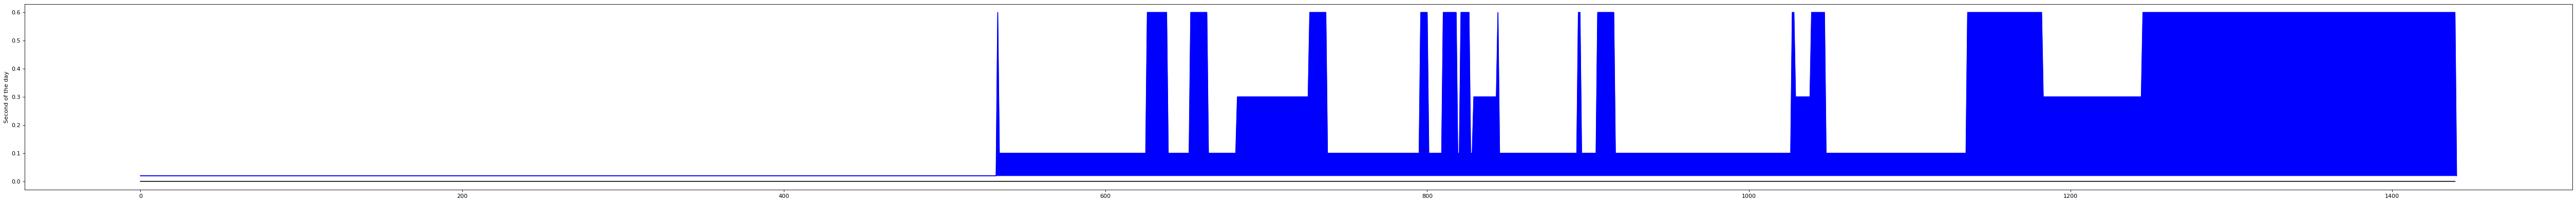

In [48]:
occupations = [copy(o) for o in day_occupations]
# Simulate day passing
current_occupation = None
day = []

current_priority = current_occupation.priority if current_occupation is not None else 9999
current_prob = current_occupation.probability if current_occupation is not None else low_occupation_prob

for sec in range(hour2min(24)):
    for i, o in enumerate(occupations):
        # Delete already consumed occupations
        if o.time <= 0:
            occupations.pop(i)

        # Take on occupations with a bigger priority
        if o.start_time is None:
            if o.priority < current_priority:
                current_occupation = o

        # Take on occupations with a bigger priority that start in  that time
        else:
            if o.start_time == sec and o.priority < current_priority:
                current_occupation = o
                break

    if current_occupation is not None:
        current_occupation.time -= 1
        if current_occupation.time <= 0:
            current_occupation = None
    
    current_priority = current_occupation.priority if current_occupation is not None else 9999
    current_prob = current_occupation.probability if current_occupation is not None else low_occupation_prob

    day.append(current_prob)
            
# plot
day.append(day[0])
f = plt.figure(num=None, figsize=(80, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(day, color='b')
plt.fill(day, color="b")
plt.plot([0 for _ in range(hour2min(24))], color='black')
plt.ylabel('Probability')
plt.ylabel('Second of the day')
plt.show()